##Here we analyse our rice_yield dataset using KMeans clustering



In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn 
from seaborn import set_style
from pandas.plotting import scatter_matrix
import os

set_style("whitegrid")

from sklearn.cluster import KMeans


In [143]:
rice_data = pd.read_csv('../Final_data/rice_yield.csv')

In [144]:

X = rice_data[['maxT_grow', 'maxT_harvest']].values

#the value k=5 is suggested by the scatter plot of (maxT_growth, maxT_harvest)
kmeans = KMeans()

kmeans.fit(X)

clusters = kmeans.predict(X)


In [145]:
kmeans.cluster_centers_

array([[33.72041805, 25.02385986],
       [21.93169231, 13.60532967],
       [31.83012216, 27.70248213],
       [26.82460584, 20.16359489],
       [34.39743514, 27.88082883],
       [15.26184314,  3.83444444],
       [28.57056886, 28.53927021],
       [32.69632968, 30.66783759]])

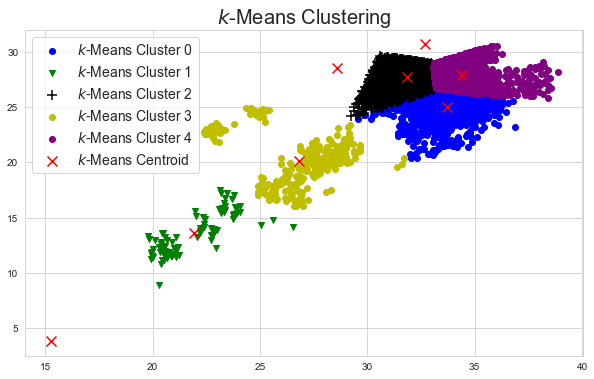

In [146]:
plt.figure(figsize=(10,6))

plt.scatter(X[clusters==0,0], X[clusters==0,1], c='b', label="$k$-Means Cluster 0")
plt.scatter(X[clusters==1,0], X[clusters==1,1], c='green', marker='v', label="$k$-Means Cluster 1")

plt.scatter(X[clusters==2,0], X[clusters==2,1], c='k', marker='+', s=100, label="$k$-Means Cluster 2")

plt.scatter(X[clusters==3,0], X[clusters==3,1], c='y',  label="$k$-Means Cluster 3")

plt.scatter(X[clusters==4,0], X[clusters==4,1], c='purple',  label="$k$-Means Cluster 4")

plt.scatter(kmeans.cluster_centers_[:,0], 
          kmeans.cluster_centers_[:,1], 
           c='r', marker='x', s=100, label='$k$-Means Centroid')

plt.legend(fontsize=14)
plt.title("$k$-Means Clustering", fontsize=20)

plt.show()

##### Updating rice_yield.csv 

by adding the columns "KM_clusterN_(maxT_growth_maxT_harvest)" that contains   the labels of the current clustering


In [147]:
rice_data = pd.DataFrame(rice_data)

rice_data["KM5_clusterN_(maxT_growth_maxT_harvest)"] = kmeans.labels_



In [148]:
rice_data = pd.DataFrame(rice_data)

rice_data["KM5_clusterN_(maxT_growth_maxT_harvest)"] = kmeans.labels_



rice_data.to_csv('../Final_data/rice_yield_KMeans.csv')

## Justification that k=5 is a reasonable choice demonstrated by the elbow method

In [149]:
inertias = []

for k in range(1,11):
    kmeans = KMeans(k)
    kmeans.fit(X)
    
   
    inertias.append(kmeans.inertia_)

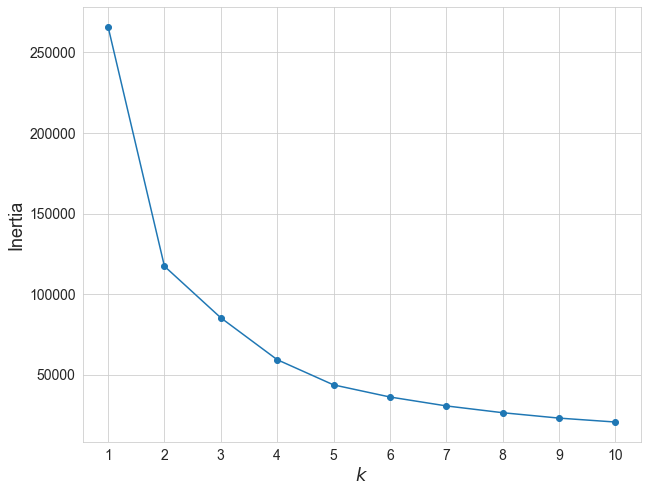

In [150]:
plt.figure(figsize=(10,8))

plt.plot(range(1,11), inertias, '-o')

plt.xlabel("$k$", fontsize=18)
plt.ylabel("Inertia", fontsize=18)

plt.xticks(range(1,11),fontsize=14)
plt.yticks(fontsize=14)

plt.show()

## Auxiliary data frame
We work with the weather related parameters: 

`prec_grow` <br>
 `prec_harvest`<br>
 `et_grow`<br>
 `et_harvest`<br>
 `maxT_grow`<br>
 `maxT_harvest`<br>
 `minT_grow`<br>
 `minT_harvest`<br>
 `windspeed_grow`<br>
 `windspeed_harvest`<br> 
 
We create an auxiliary data frame, called _Averages_, that contains averages with respect to year of the values of the above mentioned parameters
for each district

In [151]:
 # this is just a pandas series with the district numbers 
#in the same order as in the main data frame
Averages = rice_data[["Dist Code"]].drop_duplicates()

params = ["prec_grow",
                    "prec_harvest",
                    "et_grow",
                    "et_harvest",
                    "maxT_grow",
                    "maxT_harvest",
                    "minT_grow",
                    "minT_harvest",
                    "windspeed_grow",
                    "windspeed_harvest"]  # The same set of parameters as in the clusterization of Leonardo

#adding the mean values to the data frame averages
Districts = Averages["Dist Code"].values

for p in params:
    new_column = []
    for district in Districts:
        aux = rice_data[rice_data["Dist Code"] == district]
        p_mean = aux[p].mean()
        new_column.append(p_mean)
    # here we add a column named p_av to the Averages 
    #with mean values of corresponding parameter p w.r.t. year per district
    Averages[p+"_av"] = new_column


# The KMean clustering model with respect to the following data:
 
 `prec_grow` <br>
 `prec_harvest`<br>
 `et_grow`<br>
 `et_harvest`<br>
 `maxT_grow`<br>
 `maxT_harvest`<br>
 `minT_grow`<br>
 `minT_harvest`<br>
 `windspeed_grow`<br>
 `windspeed_harvest`<br> 

In [152]:
Y = Averages.values

#the value k=5 is suggested by the scatter plot of (maxT_growth, maxT_harvest)
Kmeans = KMeans(5)

Kmeans.fit(Y)

clusters = Kmeans.predict(Y)

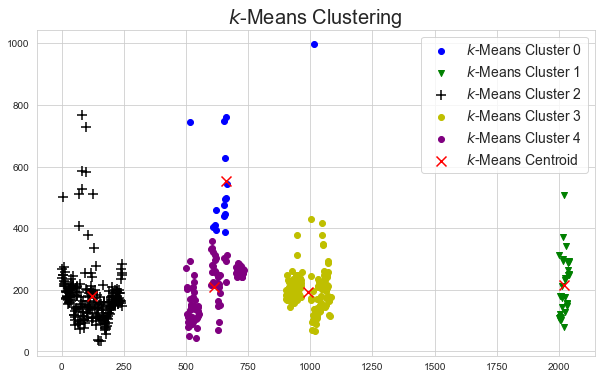

In [153]:
plt.figure(figsize=(10,6))

plt.scatter(Y[clusters==0,0], Y[clusters==0,1], c='b', label="$k$-Means Cluster 0")
plt.scatter(Y[clusters==1,0], Y[clusters==1,1], c='green', marker='v', label="$k$-Means Cluster 1")

plt.scatter(Y[clusters==2,0], Y[clusters==2,1], c='k', marker='+', s=100, label="$k$-Means Cluster 2")

plt.scatter(Y[clusters==3,0], Y[clusters==3,1], c='y',  label="$k$-Means Cluster 3")

plt.scatter(Y[clusters==4,0], Y[clusters==4,1], c='purple',  label="$k$-Means Cluster 4")

plt.scatter(Kmeans.cluster_centers_[:,0], 
          Kmeans.cluster_centers_[:,1], 
           c='r', marker='x', s=100, label='$k$-Means Centroid')

plt.legend(fontsize=14)
plt.title("$k$-Means Clustering", fontsize=20)

plt.show()

In [154]:
inertias = []

for k in range(1,15):
    Kmeans = KMeans(k)
    Kmeans.fit(Y)
    
   
    inertias.append(Kmeans.inertia_)

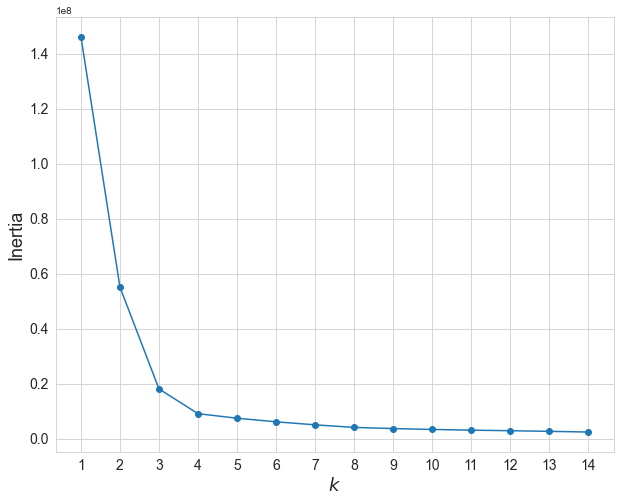

In [155]:
plt.figure(figsize=(10,8))

plt.plot(range(1,15), inertias, '-o')

plt.xlabel("$k$", fontsize=18)
plt.ylabel("Inertia", fontsize=18)

plt.xticks(range(1,15),fontsize=14)
plt.yticks(fontsize=14)

plt.show()

# Creating a new dataframe that contains the columns of rice_yields.csv except the column Year and, in addition, has the column Climate_cluster

In [156]:
rice_data = pd.DataFrame(Averages)

rice_data["KM5_clusterN_(maxT_growth_maxT_harvest)"] = Kmeans.labels_



rice_data.to_csv('../Final_data/rice_yield_KMeans_averaged.csv')


# The map of India based on the KMeans clustering 

In [157]:
import geopandas as gpd

ModuleNotFoundError: No module named 'geopandas'

In [136]:


# Read in shape file.
shp = gpd.read_file('../Final_data/districts2020.shp')


NameError: name 'gpd' is not defined

In [137]:
df = pd.read_csv('../Final_data/rice_yield_KMeans_averaged.csv')

In [138]:
# Set up a "cluster" column of NaNs.
shp['cluster'] = np.zeros(len(shp),dtype=int)*np.NaN

NameError: name 'shp' is not defined

In [139]:
for i in range(len(df)):
    shp.loc[shp['distname']==df.iloc[i]['Dist Code'], 'cluster'] = int(df.iloc[i]['KM5_clusterN_(maxT_growth_maxT_harvest)'])

NameError: name 'shp' is not defined

In [140]:
shp.sample(5, random_state=4000)

NameError: name 'shp' is not defined

NameError: name 'shp' is not defined

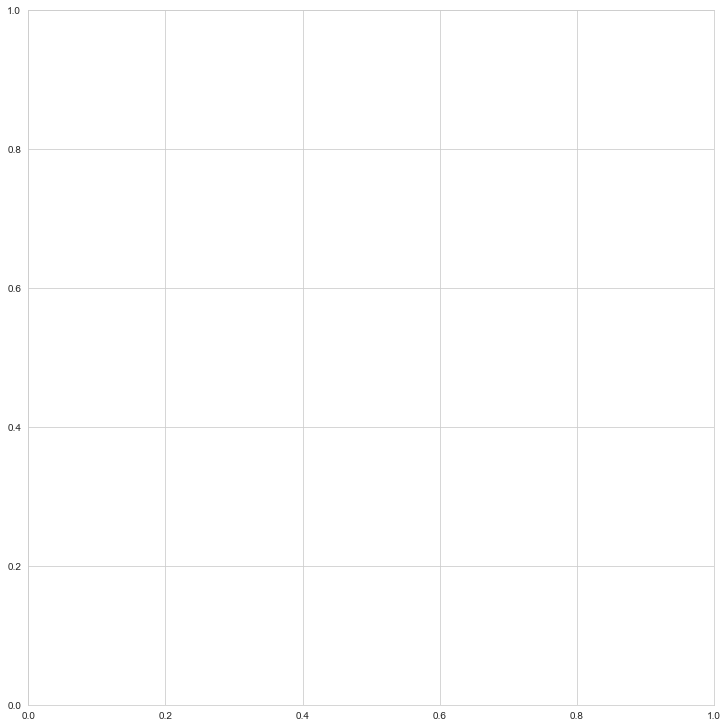

In [141]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10), constrained_layout=True)
# Show full map including NaNs.
shp.plot(ax=ax, column='cluster', edgecolor='black', cmap='YlOrRd', legend=False, categorical=True, 
        missing_kwds={'color': 'lightgrey'})
# Show map without NaNs.
noNaNs = shp.dropna().copy()
noNaNs.cluster = noNaNs.cluster.astype(int)
legend_kwds =  dict(loc='upper right', fontsize=14) 
noNaNs.plot(ax=ax, column='cluster', edgecolor='black', cmap='YlOrRd', legend=True, categorical=True,
                  legend_kwds=legend_kwds)
# Hide axes.
ax.set_axis_off()
plt.show()